# Лабораторна робота №4
## ФБ-35 Яковенко Анасатсія
## Структури для роботи з великими обсягами даних в Python

**Мета роботи**: отримати навички роботи із структурами для зберігання в Python
(python, numpy, pandas, numpy array, dataframe, timeit)

## 1-й рівень

In [1]:
import pandas as pd
import os
import requests
import numpy as np
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
import zipfile
import timeit
from datetime import datetime
print("Ready(imported)!")

Ready(imported)!


### Dataframe

In [2]:
start_time = timeit.default_timer()
def downloader(url):
    if not os.path.exists("data"):
        os.makedirs("data")
    response = requests.get(url)
    if response.status_code == 200:
        filename = os.path.join("data", url.split("/")[-1])
        
        with open(filename, "wb") as file:
            file.write(response.content)
        
        if zipfile.is_zipfile(filename):
            with zipfile.ZipFile(filename, "r") as zip_ref:
                
                zip_ref.extractall("data")
            
        
        print(f"File '{filename}' встановлено успішно")
        return filename

url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
file_path = downloader(url)
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)

File 'data\individual+household+electric+power+consumption.zip' встановлено успішно

Exec time:  3.3668084000019007


In [3]:
file = "data\household_power_consumption.txt"
start = datetime.now()
df = pd.read_csv(file, sep=';', na_values='?')
df.dropna(inplace=True)
end = datetime.now()
print(f"Execution time is {end - start}")
print(df.dtypes)

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df.tail(10)

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\User\AppData\Local\Temp\ipykernel_8976\2791853408.py:1: SyntaxWarning: invalid escape sequence '\h'
  file = "data\household_power_consumption.txt"


Execution time is 0:00:01.682221
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075249,2010-11-26,20:53:00,0.944,0.0,238.72,4.0,0.0,0.0,0.0
2075250,2010-11-26,20:54:00,0.946,0.0,239.31,4.0,0.0,0.0,0.0
2075251,2010-11-26,20:55:00,0.946,0.0,239.74,4.0,0.0,0.0,0.0
2075252,2010-11-26,20:56:00,0.942,0.0,239.41,4.0,0.0,0.0,0.0
2075253,2010-11-26,20:57:00,0.946,0.0,240.33,4.0,0.0,0.0,0.0
2075254,2010-11-26,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,2010-11-26,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## Array

In [4]:
start_time = timeit.default_timer()

dtype = [('date', 'U10'), ('time', 'U8'), ('global_active_power', float), ('global_reactive_power', float), ('voltage', float), ('global_intensity', float), ('sub_metering_1', float), ('sub_metering_2', float), ('sub_metering_3', float)]
data = np.genfromtxt('data/household_power_consumption.txt', delimiter=';', skip_header=1, dtype=dtype, filling_values=0)

stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)
print(data[:5])


Exec time:  9.579091499999777
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.)
 ('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)]


### 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.


### Dataframe

In [5]:
def filter_with_dataframe(df):
    start = datetime.now()

    result = df[df["Global_active_power"] > 5]

    end = datetime.now()
    duration = end - start

    print("DataFrame: Час виконання:", duration)
    print(result.head(), "\n")
    
    return duration

def filter_with_numpy(df):
    start = datetime.now()

    filtered = np.where(data['global_active_power'] > 5)
    filtered_data = data[filtered]    

    end = datetime.now()
    duration = end - start

    print("NumPy: Час виконання:", duration)
    print(filtered_data[:5], "\n")

    return duration
df_duration = filter_with_dataframe(df)
np_duration = filter_with_numpy(df)

if df_duration < np_duration:
    print("DataFrame швидший")
elif df_duration > np_duration:
    print("NumPy швидший")

DataFrame: Час виконання: 0:00:00.008493
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
1  2006-12-16  17:25:00                5.360                  0.436   233.63   
2  2006-12-16  17:26:00                5.374                  0.498   233.29   
3  2006-12-16  17:27:00                5.388                  0.502   233.74   
11 2006-12-16  17:35:00                5.412                  0.470   232.78   
12 2006-12-16  17:36:00                5.224                  0.478   232.99   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0   

NumPy: Час виконання: 0:00:00.018828
[('16/12/2006

### 2. Обрати всі домогосподарства, у яких вольтаж перевищує 235 В.

In [6]:
def filter_voltage_dataframe(df):
    start = datetime.now()

    result = df[df['Voltage'] > 235]

    end = datetime.now()
    duration = end - start

    print("DataFrame: Час виконання:", duration)
    print(result.head(), "\n")

    return duration

def filter_voltage_numpy(data_np):
    start_time = timeit.default_timer()

    filtered = np.where(data_np['voltage'] > 235)
    result = data_np[filtered]

    stop_time = timeit.default_timer()
    duration = stop_time - start_time

    print("NumPy: Час виконання:", duration)
    print(result[:5], "\n")

    return duration

df_duration = filter_voltage_dataframe(df)
np_duration = filter_voltage_numpy(data)

if df_duration.total_seconds() < np_duration:
    print("DataFrame швидший")
elif df_duration.total_seconds() > np_duration:
    print("NumPy швидший")


DataFrame: Час виконання: 0:00:00.083094
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
4  2006-12-16  17:28:00                3.666                  0.528   235.68   
5  2006-12-16  17:29:00                3.520                  0.522   235.02   
6  2006-12-16  17:30:00                3.702                  0.520   235.09   
7  2006-12-16  17:31:00                3.700                  0.520   235.22   
14 2006-12-16  17:38:00                4.054                  0.422   235.24   

    Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0   

NumPy: Час виконання: 0.16754429999855347
[('16/12

### 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [7]:
def filter_intensity_pandas(df):
    start = datetime.now()
    
    result = df[
        (df['Global_intensity'] >= 19) & 
        (df['Global_intensity'] <= 20) & 
        (df['Sub_metering_2'] > df['Sub_metering_3'])
    ]

    end = datetime.now()
    duration = end - start

    print("Pandas - час виконання:", duration)
    print(result.head(), "\n")

    return duration

def filter_intensity_numpy(data):
    start_time = timeit.default_timer()

    result = data[
        ((data['global_intensity'] >= 19) & 
         (data['global_intensity'] <= 20)) & 
        (data['sub_metering_2'] > data['sub_metering_3'])
    ]

    stop_time = timeit.default_timer()
    duration = stop_time - start_time

    print("NumPy - час виконання:", duration)
    print(result[:5], "\n")

    return duration


pandas_duration = filter_intensity_pandas(df)
numpy_duration = filter_intensity_numpy(data)

if pandas_duration.total_seconds() < numpy_duration:
    print("Pandas швидше")
elif pandas_duration.total_seconds() > numpy_duration:
    print("NumPy швидше")

Pandas - час виконання: 0:00:00.012189
          Date      Time  Global_active_power  Global_reactive_power  Voltage  \
45  2006-12-16  18:09:00                4.464                  0.136   234.66   
460 2006-12-17  01:04:00                4.582                  0.258   238.08   
464 2006-12-17  01:08:00                4.618                  0.104   239.61   
475 2006-12-17  01:19:00                4.636                  0.140   237.37   
476 2006-12-17  01:20:00                4.634                  0.152   237.17   

     Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
45               19.0             0.0            37.0            16.0  
460              19.6             0.0            13.0             0.0  
464              19.6             0.0            27.0             0.0  
475              19.4             0.0            36.0             0.0  
476              19.4             0.0            35.0             0.0   

NumPy - час виконання: 0.042549000001599


### 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії.

In [8]:


def mean_sample_pandas(df):
    start_pd = datetime.now()

    sample_df = df.sample(n=500000, replace=False, random_state=42)
    mean_sub1_pd = sample_df['Sub_metering_1'].mean()
    mean_sub2_pd = sample_df['Sub_metering_2'].mean()
    mean_sub3_pd = sample_df['Sub_metering_3'].mean()

    end_pd = datetime.now()
    duration = end_pd - start_pd

    print("Pandas Sample:")
    print("Середнє Sub_metering_1:", mean_sub1_pd)
    print("Середнє Sub_metering_2:", mean_sub2_pd)
    print("Середнє Sub_metering_3:", mean_sub3_pd)
    print("Час виконання (Pandas):", duration, "\n")

    return duration

def mean_sample_numpy(data):
    start_time = timeit.default_timer()

    sample_indices = np.random.choice(len(data), size=500000, replace=False)
    random_data = data[sample_indices]

    sub1 = random_data['sub_metering_1']
    sub2 = random_data['sub_metering_2']
    sub3 = random_data['sub_metering_3']

    mean_sub1 = np.mean(sub1)
    mean_sub2 = np.mean(sub2)
    mean_sub3 = np.mean(sub3)

    stop_time = timeit.default_timer()
    duration = stop_time - start_time

    print("NumPy Sample:")
    print("Середнє Sub_metering_1:", mean_sub1)
    print("Середнє Sub_metering_2:", mean_sub2)
    print("Середнє Sub_metering_3:", mean_sub3)
    print("Час виконання (NumPy):", duration, "\n")

    return duration

pandas_time = mean_sample_pandas(df)
numpy_time = mean_sample_numpy(data)

if pandas_time.total_seconds() < numpy_time:
    print("Pandas швидше")
elif pandas_time.total_seconds() > numpy_time:
    print("NumPy швидше")



Pandas Sample:
Середнє Sub_metering_1: 1.119258
Середнє Sub_metering_2: 1.308912
Середнє Sub_metering_3: 6.45295
Час виконання (Pandas): 0:00:00.246526 

NumPy Sample:
Середнє Sub_metering_1: 1.102688
Середнє Sub_metering_2: 1.286372
Середнє Sub_metering_3: 6.381598
Час виконання (NumPy): 0.17248570000083419 

NumPy швидше


### 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [9]:
def filter_and_slice_pandas(df):
    start_time = timeit.default_timer()
    threshold_time = datetime.strptime('18:00:00', '%H:%M:%S').time()
    filtered_df = df[
        (df['Time'] > threshold_time) &
        (df['Global_active_power'] > 6) &
        (df['Sub_metering_2'] > df['Sub_metering_1']) &
        (df['Sub_metering_2'] > df['Sub_metering_3'])
    ]

    first = filtered_df.iloc[0:len(filtered_df)//2:3]
    second = filtered_df.iloc[len(filtered_df)//2::4]
    result = pd.concat([first, second])

    stop_time = timeit.default_timer()
    duration = stop_time - start_time

    print("Pandas:")
    print("Час виконання:", duration)
    print(result.head(), "\n")

    return duration


def filter_and_slice_numpy(data):
    start_time = timeit.default_timer()

    mask = (
        (data['time'] > '18:00:00') &
        (data['global_active_power'] > 6) &
        (data['sub_metering_2'] > data['sub_metering_1']) &
        (data['sub_metering_2'] > data['sub_metering_3'])
    )
    filtered_data = data[mask]

    first_half = filtered_data[:len(filtered_data)//2:3]
    second_half = filtered_data[len(filtered_data)//2::4]

    result = np.concatenate([first_half, second_half])

    stop_time = timeit.default_timer()
    duration = stop_time - start_time

    print("NumPy:")
    print("Час виконання:", duration)
    print(result[:5], "\n")

    return duration


pandas_time = filter_and_slice_pandas(df)
numpy_time = filter_and_slice_numpy(data)

if pandas_time < numpy_time:
    print("Pandas швидше")
elif pandas_time > numpy_time:
    print("NumPy швидше")



Pandas:
Час виконання: 0.08836920000248938
            Date      Time  Global_active_power  Global_reactive_power  \
41    2006-12-16  18:05:00                6.052                  0.192   
44    2006-12-16  18:08:00                6.308                  0.116   
17494 2006-12-28  20:58:00                6.386                  0.374   
17498 2006-12-28  21:02:00                8.088                  0.262   
17501 2006-12-28  21:05:00                7.230                  0.152   

       Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       Sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498  

## 2-й рівень

In [10]:
start_time = timeit.default_timer()

headers = [
    'family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling',
    'condition', 'formability', 'strength', 'non-ageing', 'surface-finish',
    'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl',
    'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr',
    'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape',
    'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class'
]


df = pd.read_csv("data/anneal.data", names=headers)

stop_time = timeit.default_timer()

print("\nЧас виконання:", stop_time - start_time)
print(df.head())


Час виконання: 0.04397320000134641
  family product-type steel  carbon  hardness temper_rolling condition  \
0      ?            C     A       8         0              ?         S   
1      ?            C     R       0         0              ?         S   
2      ?            C     R       0         0              ?         S   
3      ?            C     A       0        60              T         ?   
4      ?            C     A       0        60              T         ?   

  formability  strength non-ageing  ...  s  p  shape  thick   width  len oil  \
0           ?         0          ?  ...  ?  ?   COIL  0.700   610.0    0   ?   
1           2         0          ?  ...  ?  ?   COIL  3.200   610.0    0   ?   
2           2         0          ?  ...  ?  ?  SHEET  0.700  1300.0  762   ?   
3           ?         0          ?  ...  ?  ?   COIL  2.801   385.1    0   ?   
4           ?         0          ?  ...  ?  ?  SHEET  0.801   255.0  269   ?   

  bore packing class  
0    0       ? 

In [11]:
start_time = timeit.default_timer()

data = np.genfromtxt('data/anneal.data', delimiter=',', dtype=str)
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data[:5])


Exec time:  0.03466959999786923
[['?' 'C' 'A' '08' '00' '?' 'S' '?' '000' '?' '?' 'G' '?' '?' '?' '?' '?'
  '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' 'COIL' '0.700'
  '0610.0' '0000' '?' '0000' '?' '3']
 ['?' 'C' 'R' '00' '00' '?' 'S' '2' '000' '?' '?' 'E' '?' '?' '?' '?' '?'
  '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' 'Y' '?' '?' '?' 'COIL' '3.200'
  '0610.0' '0000' '?' '0000' '?' '3']
 ['?' 'C' 'R' '00' '00' '?' 'S' '2' '000' '?' '?' 'E' '?' '?' 'Y' '?' 'B'
  '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' 'SHEET' '0.700'
  '1300.0' '0762' '?' '0000' '?' '3']
 ['?' 'C' 'A' '00' '60' 'T' '?' '?' '000' '?' '?' 'G' '?' '?' '?' '?' 'M'
  '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' 'COIL' '2.801'
  '0385.1' '0000' '?' '0000' '?' '3']
 ['?' 'C' 'A' '00' '60' 'T' '?' '?' '000' '?' '?' 'G' '?' '?' '?' '?' 'B'
  'Y' '?' '?' '?' 'Y' '?' '?' '?' '?' '?' '?' '?' '?' '?' 'SHEET' '0.801'
  '0255.0' '0269' '?' '0000' '?' '3']]



## 1. Поборотися із зниклими даними.

#### Кількість пропущених значень у кожній колонці

In [12]:
print((df == '?').sum())  

family                    687
product-type                0
steel                      70
carbon                      0
hardness                    0
temper_rolling            675
condition                 271
formability               283
strength                    0
non-ageing                703
surface-finish            790
surface-quality           217
enamelability             785
bc                        797
bf                        680
bt                        736
bw/me                     609
bl                        662
m                         798
chrom                     775
phos                      791
cbond                     730
marvi                     798
exptl                     796
ferro                     772
corr                      798
blue/bright/varn/clean    793
lustre                    753
jurofm                    798
s                         798
p                         798
shape                       0
thick                       0
width     

#### 1. Метод: Видалення всіх рядків, де є хоча б один NaN (dropna)

In [13]:
df_copy = df.copy()

start_time = timeit.default_timer()

df_copy.replace('?', np.nan, inplace=True)
df_copy.dropna(how='all', inplace=True) # видаляються тільки ті рядки, де всі значення пропущені
#df_copy.dropna(inplace=True) у всіх строках був хоча б один пропуск, тому тут всі видаляються

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)

print(df_copy.head())


Exec time:  0.00549450000107754
  family product-type steel  carbon  hardness temper_rolling condition  \
0    NaN            C     A       8         0            NaN         S   
1    NaN            C     R       0         0            NaN         S   
2    NaN            C     R       0         0            NaN         S   
3    NaN            C     A       0        60              T       NaN   
4    NaN            C     A       0        60              T       NaN   

  formability  strength non-ageing  ...   s   p  shape  thick   width  len  \
0         NaN         0        NaN  ... NaN NaN   COIL  0.700   610.0    0   
1           2         0        NaN  ... NaN NaN   COIL  3.200   610.0    0   
2           2         0        NaN  ... NaN NaN  SHEET  0.700  1300.0  762   
3         NaN         0        NaN  ... NaN NaN   COIL  2.801   385.1    0   
4         NaN         0        NaN  ... NaN NaN  SHEET  0.801   255.0  269   

   oil bore  packing class  
0  NaN    0      NaN    

C:\Users\User\AppData\Local\Temp\ipykernel_8976\2380298027.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.replace('?', np.nan, inplace=True)


In [14]:
data_copy = data.copy()
start_time = timeit.default_timer()

data_copy[data_copy == '?'] = np.nan
data_clean = data_copy[~np.any(data_copy == "nan", axis=1)]
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data_clean[:5])


Exec time:  0.0012955000020156149
[]


##### 2. Метод: Заповнення (імпутація) пропущених значень

In [15]:
df_stat = df.copy()
df_stat.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,class
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [16]:
start_time = timeit.default_timer()
numeric_cols = df_stat.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_cols:
    mean_val = df_stat[col].mean()
    df_stat[col] = df_stat[col].fillna(mean_val)

categorical_cols = df_stat.select_dtypes(include="object").columns

for col in categorical_cols:
    mode_val = df_stat[col].mode()
    if not mode_val.empty:
        df_stat[col] = df_stat[col].fillna(mode_val[0])
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
df_stat.head()



Exec time:  0.029718299996602582


,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,class
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [17]:
start_time = timeit.default_timer()
def mode(array):
    modes = []
    for column in array.T:
        clean_column = column[column != '?']
        if len(clean_column) == 0:
            modes.append('?') 
            continue
        unique, number = np.unique(clean_column, return_counts=True)
        mode_index = np.argmax(number)
        mode_value = unique[mode_index]
        modes.append(mode_value)
    return modes


def replace(array, modes):
    for i, column in enumerate(array.T):
        missing = np.where(column == '?')[0]
        column[missing] = modes[i]

modes = mode(data)
replace(data, modes)
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data[:5])
print(modes)


Exec time:  0.004592599998431979
[['TN' 'C' 'A' '08' '00' 'T' 'S' '2' '000' 'N' 'P' 'G' '2' 'Y' 'Y' 'Y'
  'B' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?' 'COIL'
  '0.700' '0610.0' '0000' 'Y' '0000' '3' '3']
 ['TN' 'C' 'R' '00' '00' 'T' 'S' '2' '000' 'N' 'P' 'E' '2' 'Y' 'Y' 'Y'
  'B' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?' 'COIL'
  '3.200' '0610.0' '0000' 'Y' '0000' '3' '3']
 ['TN' 'C' 'R' '00' '00' 'T' 'S' '2' '000' 'N' 'P' 'E' '2' 'Y' 'Y' 'Y'
  'B' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?' 'SHEET'
  '0.700' '1300.0' '0762' 'Y' '0000' '3' '3']
 ['TN' 'C' 'A' '00' '60' 'T' 'S' '2' '000' 'N' 'P' 'G' '2' 'Y' 'Y' 'Y'
  'M' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?' 'COIL'
  '2.801' '0385.1' '0000' 'Y' '0000' '3' '3']
 ['TN' 'C' 'A' '00' '60' 'T' 'S' '2' '000' 'N' 'P' 'G' '2' 'Y' 'Y' 'Y'
  'B' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?' 'SHEET'
  '0.801' '0255.0' '0269' 'Y' '0000' '3' '3']]
[np.str_('TN'), np.str_('C'), np.


## 2. Пронормувати вибраний датасет або стандартизувати його

In [18]:
num_columns = df.select_dtypes(include=['int', 'float'])

start_time = timeit.default_timer()
for column in num_columns:
    mean = df[column].mean()
    std = df[column].std()
    standardized = (df[column] - mean) / std
    df[column] = standardized
    
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Standart:")
print(df.head())

start_time = timeit.default_timer()
for column in num_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    normalized = (df[column] - min_val) / (max_val - min_val)
    df[column] = normalized 


stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Norm:")
print(df.head())


Exec time:  0.004157600000326056
Standart:
  family product-type steel    carbon  hardness temper_rolling condition  \
0      ?            C     A  0.327558 -0.477159              ?         S   
1      ?            C     R -0.260996 -0.477159              ?         S   
2      ?            C     R -0.260996 -0.477159              ?         S   
3      ?            C     A -0.260996  1.959785              T         ?   
4      ?            C     A -0.260996  1.959785              T         ?   

  formability  strength non-ageing  ...  s  p  shape     thick     width  \
0           ? -0.266999          ?  ...  ?  ?   COIL -0.559242 -0.424351   
1           2 -0.266999          ?  ...  ?  ?   COIL  2.342311 -0.424351   
2           2 -0.266999          ?  ...  ?  ?  SHEET -0.559242  1.280521   
3           ? -0.266999          ?  ...  ?  ?   COIL  1.879223 -0.980041   
4           ? -0.266999          ?  ...  ?  ?  SHEET -0.442019 -1.301496   

        len oil      bore packing class  


In [19]:



df = df.apply(pd.to_numeric, errors='ignore')


numeric_cols = df.select_dtypes(include=['int64', 'float64'])

numeric_col_indices = [df.columns.get_loc(col) for col in numeric_cols.columns]

print("Індекси колонок з числовими значеннями:", numeric_col_indices)
print("Назви колонок:", list(numeric_cols.columns))


Індекси колонок з числовими значеннями: [3, 4, 8, 32, 33, 34, 36]
Назви колонок: ['carbon', 'hardness', 'strength', 'thick', 'width', 'len', 'bore']


C:\Users\User\AppData\Local\Temp\ipykernel_8976\3785331854.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [20]:
column_indx = [3, 4, 8, 32, 33, 34, 36]


start_time = timeit.default_timer()
for column_index in column_indx:
    column = data[:, column_index].astype(float)
    mean = np.mean(column)
    std = np.std(column)
    standardized = (column - mean) / std
    data[:, column_index] = standardized
    

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Standart:")
print(data[:5])

start_time = timeit.default_timer()
for column_index in column_indx:
    column = data[:, column_index].astype(float)
    min_val = np.min(column)
    max_val = np.max(column)
    normalized = (column - min_val) / (max_val - min_val)
    data[:, column_index] = normalized
    
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Norm:")
print(data[:5])


Exec time:  0.007250799997564172
Standart:
[['TN' 'C' 'A' '0.3277' '-0.477' 'T' 'S' '2' '-0.267' 'N' 'P' 'G' '2' 'Y'
  'Y' 'Y' 'B' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?'
  'COIL' '-0.559' '-0.424' '-0.675' 'Y' '-0.226' '3' '3']
 ['TN' 'C' 'R' '-0.261' '-0.477' 'T' 'S' '2' '-0.267' 'N' 'P' 'E' '2' 'Y'
  'Y' 'Y' 'B' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?'
  'COIL' '2.3437' '-0.424' '-0.675' 'Y' '-0.226' '3' '3']
 ['TN' 'C' 'R' '-0.261' '-0.477' 'T' 'S' '2' '-0.267' 'N' 'P' 'E' '2' 'Y'
  'Y' 'Y' 'B' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?'
  'SHEET' '-0.559' '1.2813' '-0.271' 'Y' '-0.226' '3' '3']
 ['TN' 'C' 'A' '-0.261' '1.9610' 'T' 'S' '2' '-0.267' 'N' 'P' 'G' '2' 'Y'
  'Y' 'Y' 'M' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?'
  'COIL' '1.8804' '-0.980' '-0.675' 'Y' '-0.226' '3' '3']
 ['TN' 'C' 'A' '-0.261' '1.9610' 'T' 'S' '2' '-0.267' 'N' 'P' 'G' '2' 'Y'
  'Y' 'Y' 'B' 'Y' '?' 'C' 'P' 'Y' '?' 'Y' 'Y' '?' 'B' 'Y' '?' '?' '?'
  '

## 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

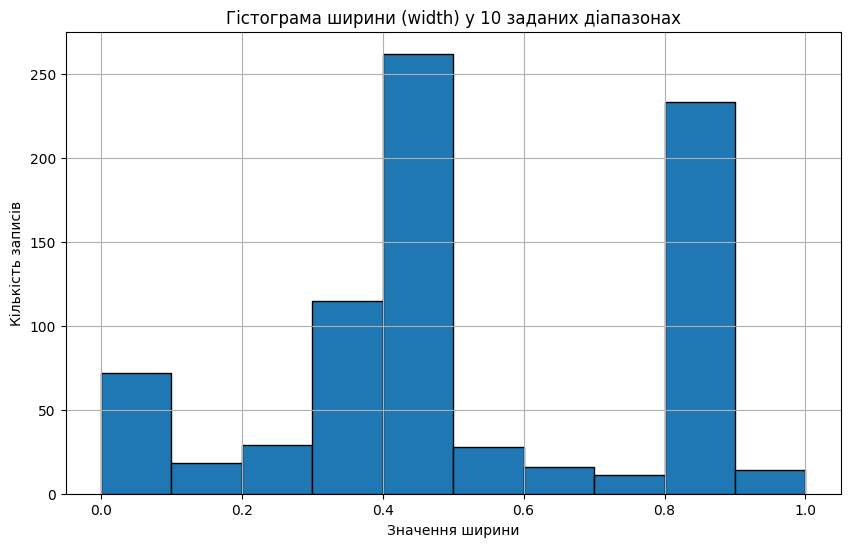


Exec time:  0.2253235999996832


In [21]:
start_time = timeit.default_timer()

plt.figure(figsize=(10, 6))
plt.hist(df["width"], bins=10, edgecolor='black')

plt.title("Гістограма ширини (width) у 10 заданих діапазонах")
plt.xlabel("Значення ширини")
plt.ylabel("Кількість записів")
plt.grid(True)
plt.show()
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)

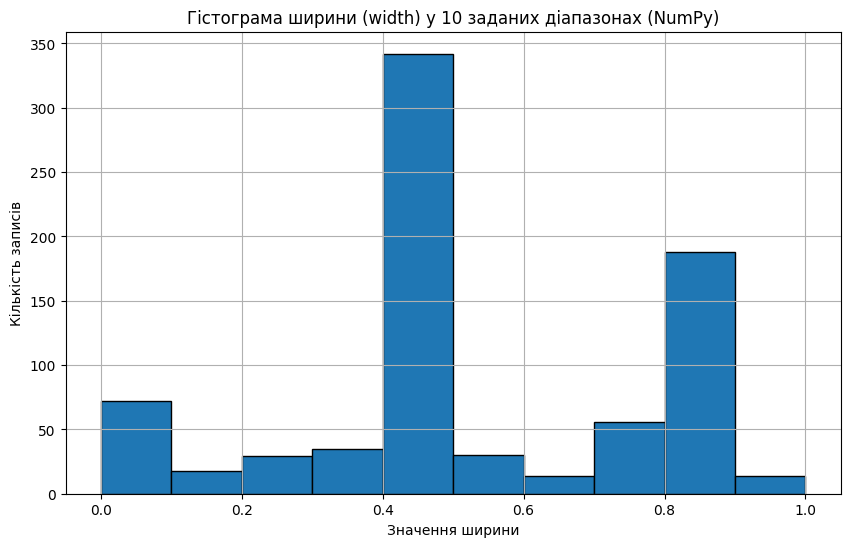


Exec time:  0.131069999999454


In [32]:
start_time = timeit.default_timer()

width_column = data[:, 33]

width_column = pd.Series(width_column)

width_column = pd.to_numeric(width_column, errors='coerce')

width_column = width_column.dropna()

plt.figure(figsize=(10, 6))
plt.hist(width_column, bins=10, edgecolor='black')
plt.title("Гістограма ширини (width) у 10 заданих діапазонах (NumPy)")
plt.xlabel("Значення ширини")
plt.ylabel("Кількість записів")
plt.grid(True)
plt.show()
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)


## 4. Збудувати графік залежності одного integer/real атрибута від іншого.

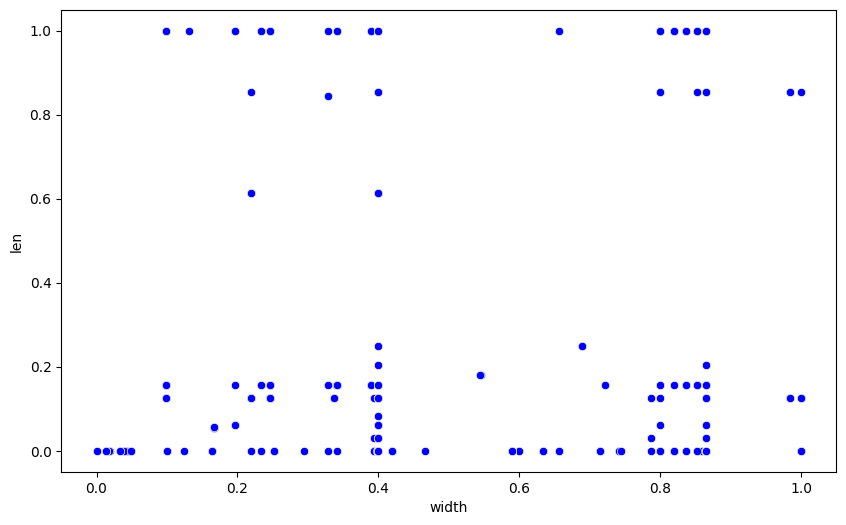


Exec time:  0.11284859999796026


In [23]:
start_time = timeit.default_timer()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='width', y='len', color='blue')
plt.xlabel('width')
plt.ylabel('len')
plt.show()
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)


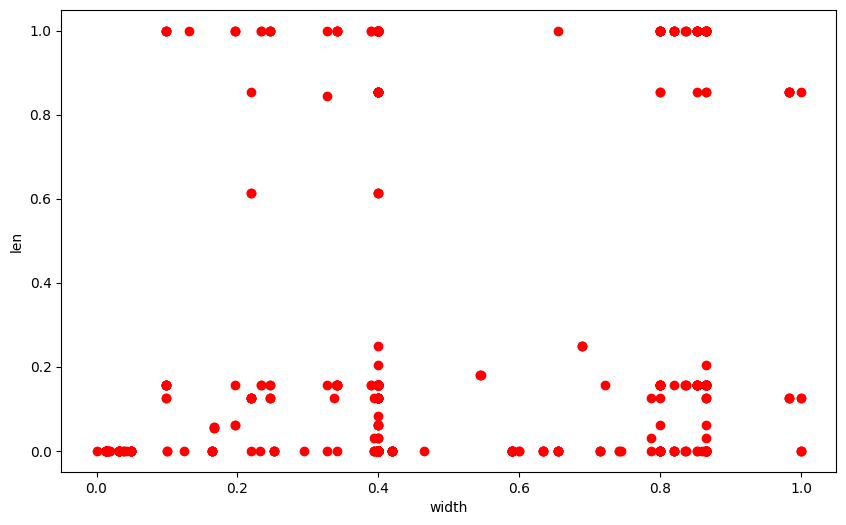


Exec time:  0.11181850000139093


In [24]:
start_time = timeit.default_timer()
engine_size = data[:, 33].astype(float)
price = data[:, 34].astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(engine_size, price, color='red')
plt.xlabel('width')
plt.ylabel('len')
plt.show()
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)

## 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [25]:
start_time = timeit.default_timer()
x = df['width'].astype(float)
y = df['len'].astype(float)

pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Pirc:", pearson)
print("Spirc:", spearman)


Exec time:  0.00313819999792031
Pirc: 0.12992410259680215
Spirc: 0.1577556199497097


In [26]:
start_time = timeit.default_timer()
x = data[:, 33].astype(float)
y = data[:, 34].astype(float)

pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Pirc:", pearson)
print("Spirc:", spearman)


Exec time:  0.0027788000006694347
Pirc: 0.12995829424784122
Spirc: 0.14129438110784456



## 6. Провести One Hot Encoding категоріального string атрибуту.

In [33]:
start_time = timeit.default_timer()
categorical_col = "steel"

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot_encoded = encoder.fit_transform(df[[categorical_col]])

onehot_df = pd.DataFrame(onehot_encoded, 
                         columns=encoder.get_feature_names_out([categorical_col]))

onehot_df.index = df.index

df_encoded = pd.concat([df, onehot_df], axis=1)

print(df_encoded.head())
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)

  family product-type steel    carbon  hardness temper_rolling condition  \
0      ?            C     A  0.114286  0.000000              ?         S   
1      ?            C     R  0.000000  0.000000              ?         S   
2      ?            C     R  0.000000  0.000000              ?         S   
3      ?            C     A  0.000000  0.705882              T         ?   
4      ?            C     A  0.000000  0.705882              T         ?   

  formability  strength non-ageing  ... packing class steel_? steel_A steel_K  \
0           ?       0.0          ?  ...       ?     3     0.0     1.0     0.0   
1           2       0.0          ?  ...       ?     3     0.0     0.0     0.0   
2           2       0.0          ?  ...       ?     3     0.0     0.0     0.0   
3           ?       0.0          ?  ...       ?     3     0.0     1.0     0.0   
4           ?       0.0          ?  ...       ?     3     0.0     1.0     0.0   

  steel_M steel_R steel_S steel_V steel_W  
0     0.0   

In [34]:

start_time = timeit.default_timer()
workclass_col = data[:, 2].reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot_encoded_np = encoder.fit_transform(workclass_col)


print(" закодованого атрибуту 'steel':")
print(onehot_encoded_np[:5])
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)

 закодованого атрибуту 'steel':
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]

Exec time:  0.003452199998719152



## 7. Провести візуалізацію багатовимірних даних.

In [29]:
print(df.columns.tolist())


['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class']


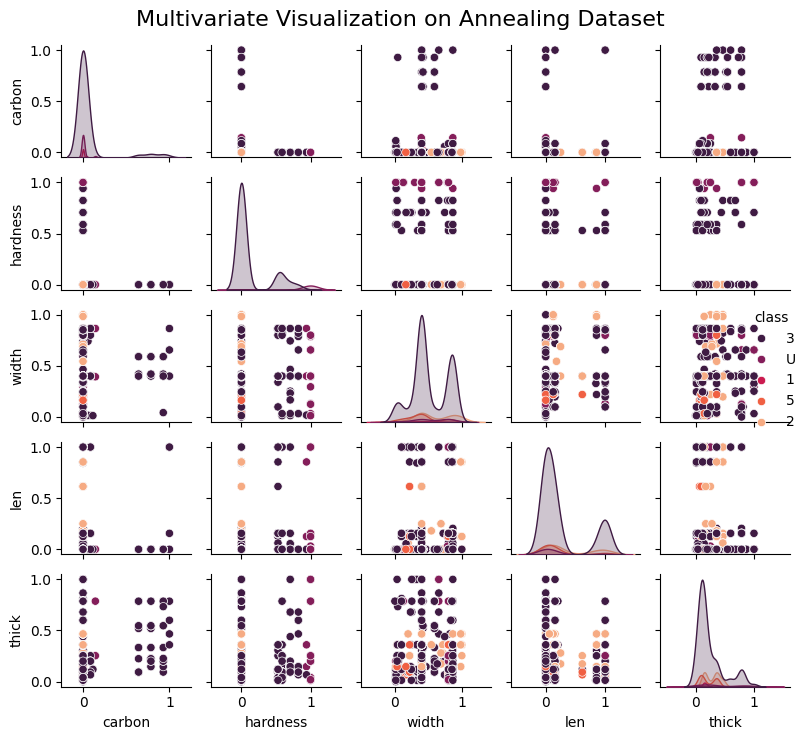

Exec time: 4.10816160000104


In [30]:
start_time = timeit.default_timer()

selected_cols = ['steel', 'carbon', 'hardness', 'width', 'len', 'thick', 'class']
sns.pairplot(df[selected_cols], hue='class', height=1.5, palette='rocket')

plt.suptitle("Multivariate Visualization on Annealing Dataset", fontsize=16)
plt.tight_layout()
plt.show()

stop_time = timeit.default_timer()
print("Exec time:", stop_time - start_time)

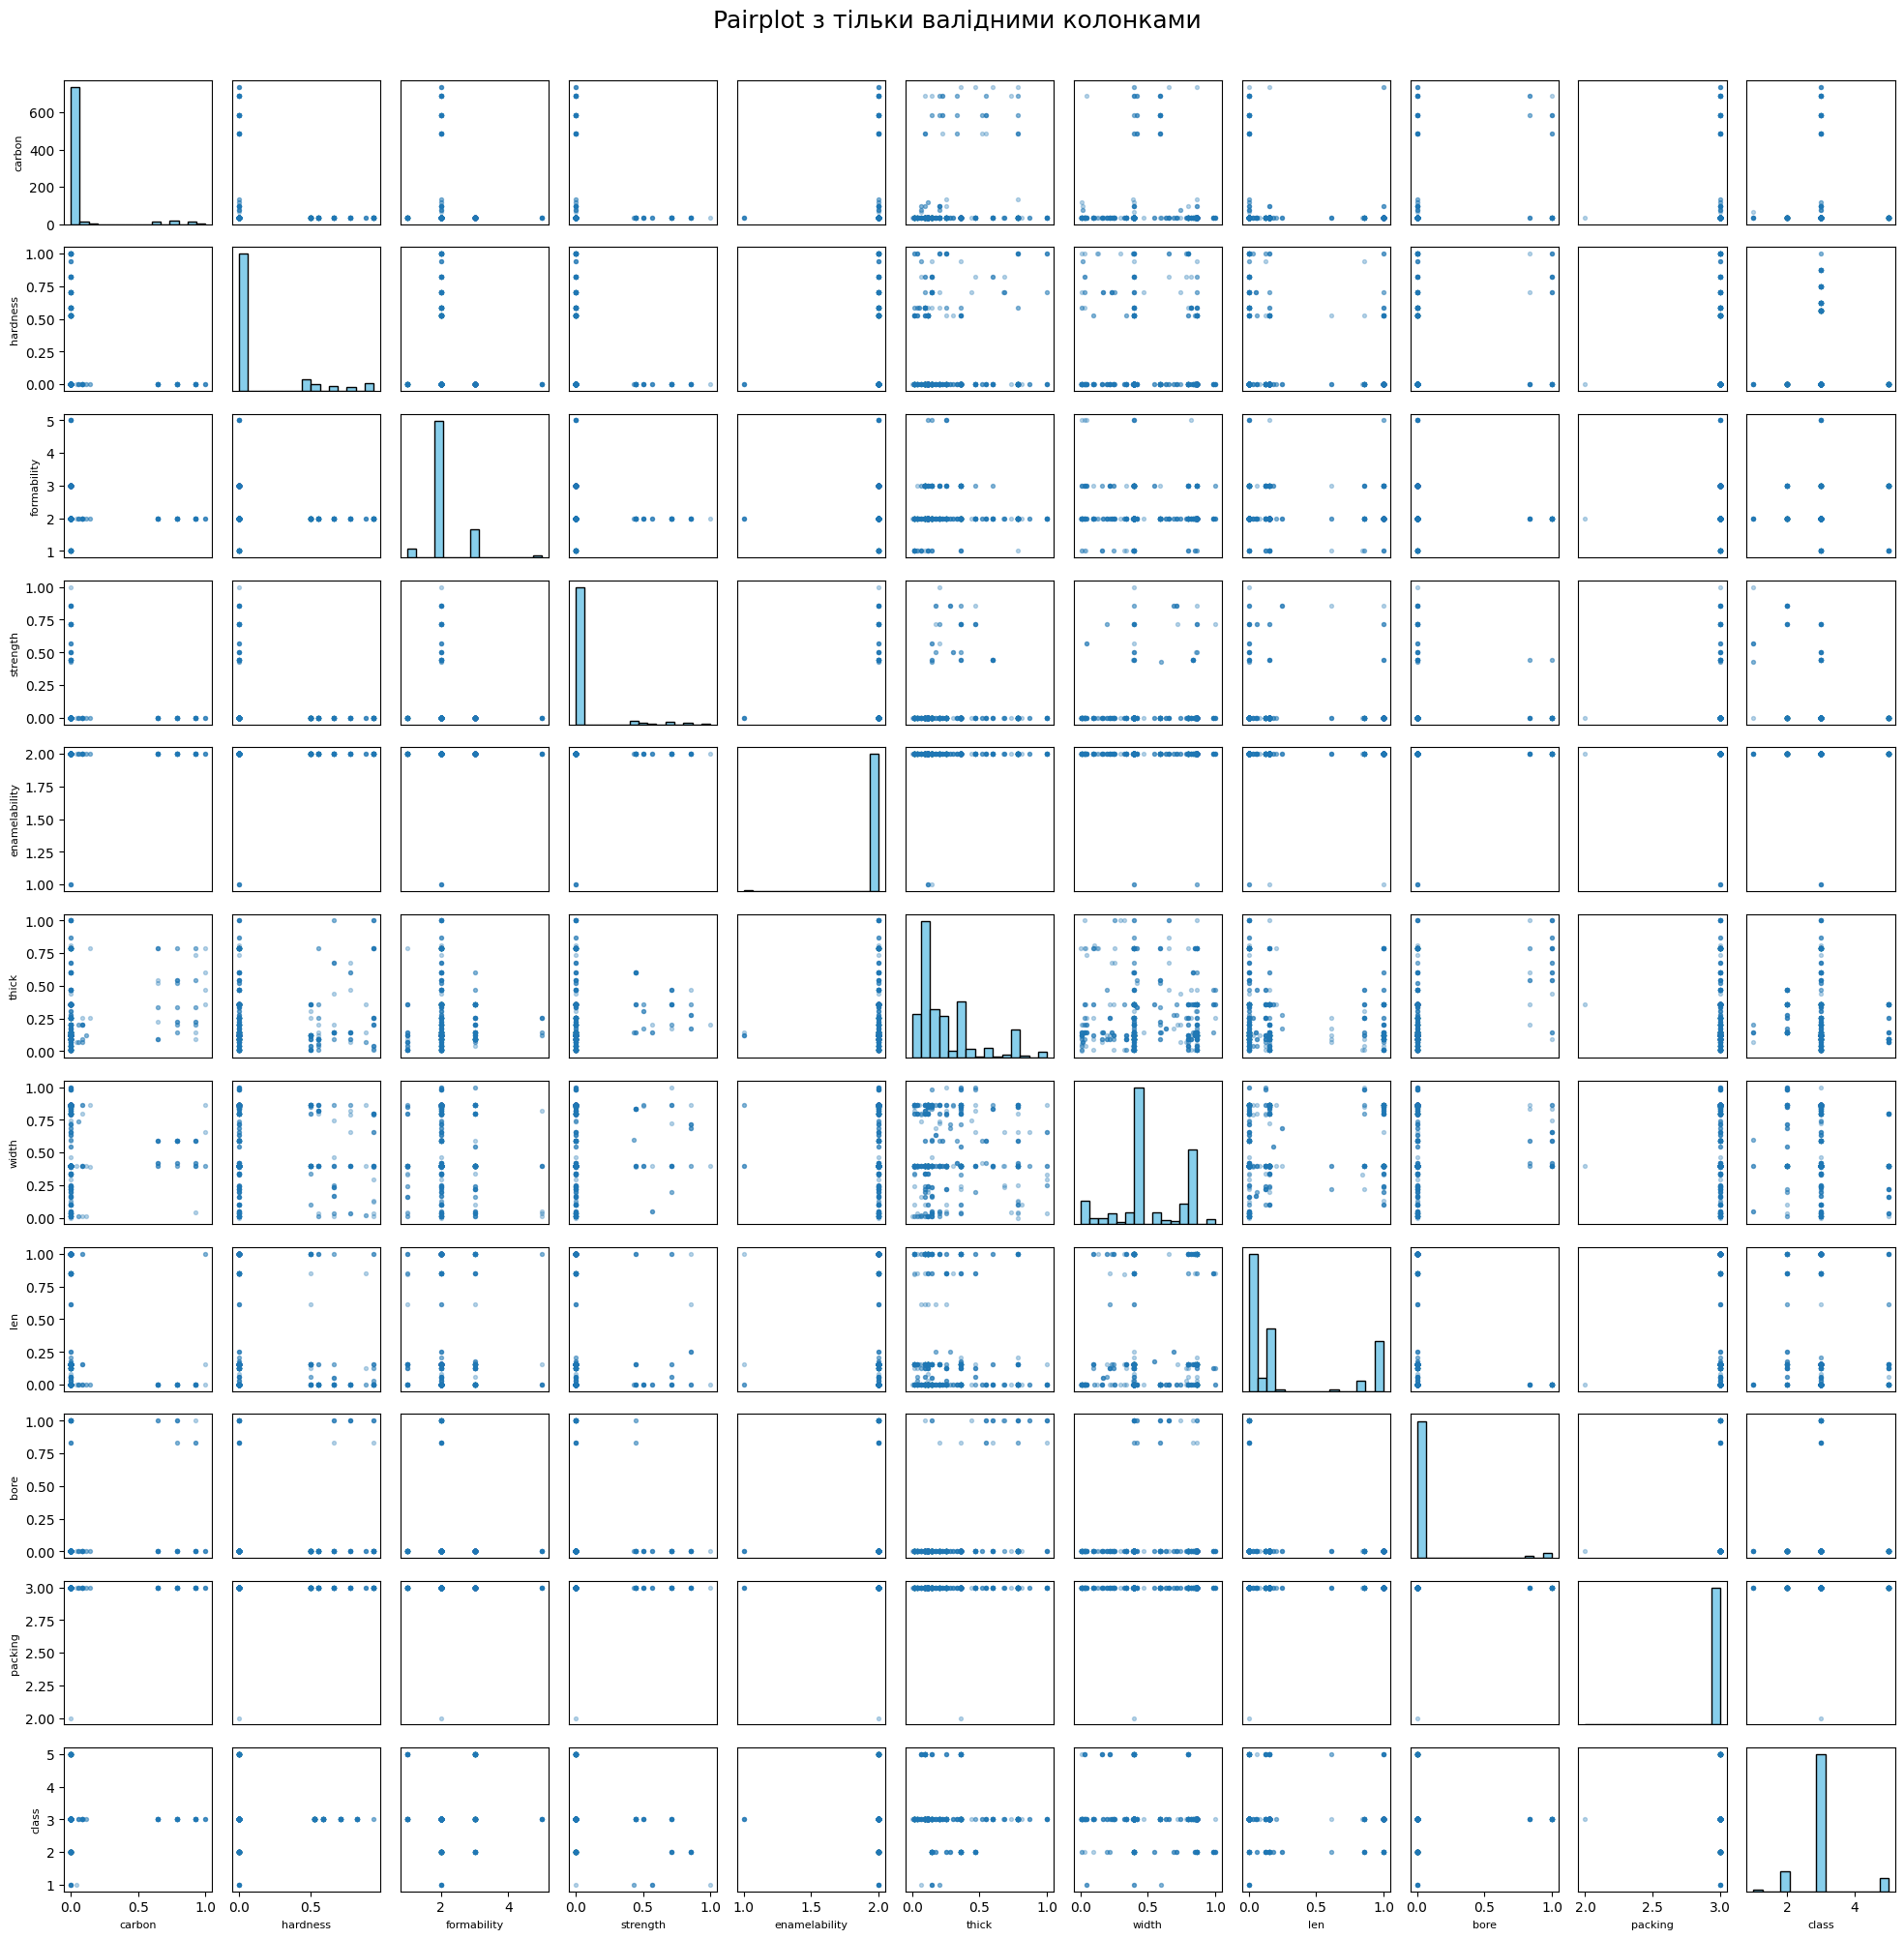

In [ ]:
headers = [
    'family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling',
    'condition', 'formability', 'strength', 'non-ageing', 'surface-finish',
    'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl',
    'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr',
    'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape',
    'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class'
]

df_clean = pd.DataFrame(data, columns=headers)

df_numeric_try = df_clean.apply(pd.to_numeric, errors='coerce')

numeric_df = df_numeric_try.loc[:, df_numeric_try.notna().any()]

numeric_array = numeric_df.to_numpy()
n_features = numeric_array.shape[1]
numeric_cols_filtered = numeric_df.columns.tolist()

fig, axs = plt.subplots(n_features, n_features, figsize=(1.8 * n_features, 1.8 * n_features))

for i in range(n_features):
    for j in range(n_features):
        ax = axs[i, j]
        col_i = numeric_array[:, i]
        col_j = numeric_array[:, j]

        if i == j:
            col = col_i[~np.isnan(col_i)]
            if len(col) > 0:
                ax.hist(col, bins=15, edgecolor='black', color='skyblue')
                ax.set_ylim(bottom=0)
        else:
            mask = ~np.isnan(col_i) & ~np.isnan(col_j)
            ax.scatter(col_j[mask], col_i[mask], alpha=0.3, s=8)

        if i < n_features - 1:
            ax.set_xticks([])
        if j > 0:
            ax.set_yticks([])

        if i == n_features - 1:
            ax.set_xlabel(numeric_cols_filtered[j], fontsize=8)
        if j == 0:
            ax.set_ylabel(numeric_cols_filtered[i], fontsize=8)

plt.suptitle("Pairplot з тільки валідними колонками", fontsize=18, y=1.01)
plt.tight_layout()
plt.show()
